In [1]:
using Latexify 
using LaTeXStrings
using Distributions
include("../src/ifs.jl")

VERMELHO = [1, 0, 0]
VERDE = [0, 1, 0]
AZUL = [0, 0, 1]

COLORS_τ = (VERMELHO, VERDE, AZUL)

print("Done.")

Done.

$X,\Theta$ are compact metric spaces, equipped with $\mathscr{B}(X)$ and $\mathscr{B}(\Theta)$ respectively the Borel $\sigma$-algebra for $X$ and $\Theta$.

Take $\mu={(\mu_{x})}_{x\in X}$ a collection of measures on $\mathscr{B}(\Theta)$, such that
- $0 < \mu_{x}(\Theta) < \infty$ for all $x\in X$,
- $x \mapsto \mu_{x}(A)$ is a Borel map, i.e, is $\mathscr{B}(X)$-measurable for all fixed $A\in\mathscr{B}(\Theta)$.
- $x \mapsto \mu_{x}$ is weak$^{*}$-continuous.

An Iterated Function System with measures $\mu$, IFSm for short, is a triple
$\mathscr{R}(\mu)=(X, \tau, \mu)$, where $\tau={(\tau_{\theta})}_{\theta\in\Theta}$ is a collection of functions from $X$ to itself with the following
- $\tau: (\Theta, X) \mapsto X$, where $\tau(\theta, x) = \tau_{\theta}(x)$ is continuous.

The $\mathscr{R}(\mu)$ is said to be **normalized** if for all $x\in X$, $\mu_{x}$ is a probability measure.

In [2]:
# v ∈ [0, 1]×[0, 1] = X, Θ = {1, 2, …, 6}
f₁(v) = v ./ 2
f₂(v) = f₁(v) .+ [1, 0]
f₃(v) = f₁(v) .+ [0, 1]

################# IFSm ####################
X = Jifs.QuadPlot(
    (pos, w, h) -> pos .* [w, h],
    (Uniform(0, 1), Uniform(0, 1)) # pega um ponto aleatório em X=[0, 1]×[0, 1]
)
τ = [f₁, f₂, f₃]
μ = [1/3, 1/3, 1/3]

# configs
width, heigth = (300, 300)
npoints = 100
iters = 500

τ_colors = [
    Jifs.IFSMap(τ[i], color=COLORS_τ[i]) 
                        for i in 1:length(τ)  
]

# Definindo IFSm
ifs_simples = Jifs.IFS(
    Jifs.ImageData(width, heigth),
    τ_colors, #Jifs.IFSMap.(τ),
    μ
)

# Painting img
Jifs.painting!(ifs_simples, iters, npoints, quad=X)

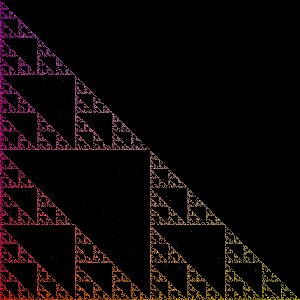

In [3]:
Jifs.showifs!(ifs_simples, iters)

In [4]:
width, heigth = (600, 300)
npoints = 1000
iters = 4000

ifs_fern = Jifs.barnsley_fern(width, heigth)
Jifs.painting!(ifs_fern, iters, npoints, quad=Jifs.Quad12)

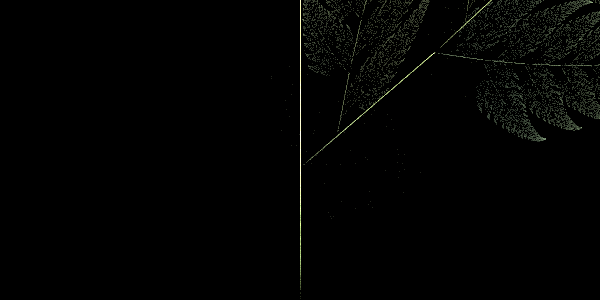

In [5]:
Jifs.showifs!(ifs_fern, iters)

### O que há de novo nisso?
1. O conjunto de mapas não precisa ser finito.

In [82]:
function rand_rot(vec::Vector{Float64})
    θ = rand(Uniform(0, π/2))
    [
        cos(θ) -sin(θ)
        sin(θ) cos(θ)
    ] * vec
end

rand_rot (generic function with 2 methods)

In [83]:
τ_colors2 = [
    Jifs.IFSMap(τ[i], color=COLORS_τ[i]) 
                        for i in 1:length(τ)  
]
push!(τ_colors2, Jifs.IFSMap(rand_rot, color=[1, 0, 1]))

μ2 = ones(4) ./ 4

# configs
width, heigth = (300, 300)
npoints = 500
iters = 4000

# Definindo IFSm
ifs_simples2 = Jifs.IFS(
    Jifs.ImageData(width, heigth),
    τ_colors2, 
    μ2
)

# Painting img
Jifs.painting!(ifs_simples2, iters, npoints, quad=X)

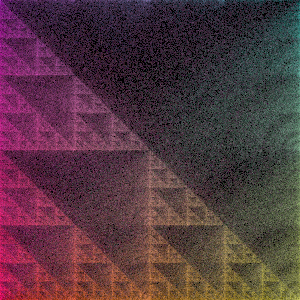

In [84]:
Jifs.showifs!(ifs_simples2, iters)

In [76]:
m = fill([1., 1.], 3)
rand_rot.(m)

3-element Vector{Vector{Float64}}:
 [-1.4065075666574067, 0.14743291672981407]
 [-1.3169662845330572, -0.5153637602734542]
 [-0.8507625785450496, 1.1296915662902767]

In [126]:
function rand_fam1(vec::Vector{Float64})
    x, y = vec
    θ = rand(2)
    if θ[1] > 0.8
        x ≈ 1 && (x = 0.999)
        x = 1 / (1-x)
    else
        x ≈ 0 && (x = 0.001)
        x = 1 / x
    end
    
    if θ[2] > 0.2
        y ≈ 1 && (y = 0.999)
        y = 1 / (1-y)
    else
        y ≈ 0 && (y = 0.001)
        y = 1 / y
    end
    [x, y]
end

m = fill([1., 1.], 3)
rand_trans.(m)

3-element Vector{Vector{Float64}}:
 [1.1768514969263495, 0.04653121260300619]
 [0.6246838393968368, 1.762743526204498]
 [0.040083743154230245, 1.9311278248815187]

In [152]:
# configs
width, heigth = (200, 200)
npoints = 500
iters = 300

ifs_maps = [
    Jifs.IFSMap(rand_rot, color=[0.8, 0, 0.2]),
    Jifs.IFSMap(rand_fam1, color=[0.2, 0, 0.8])
]

# Definindo IFSm
ifs_simples3 = Jifs.IFS(
    Jifs.ImageData(width, heigth),
    ifs_maps, 
    [0.5, 0.5]
)

# Painting img
Jifs.painting!(ifs_simples3, iters, npoints, quad=X)

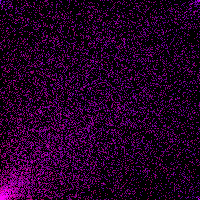

In [153]:
Jifs.showifs!(ifs_simples3, iters)